In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
#reading the data set
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#seting questions

In [4]:
#1-which area most has no show
#2-is the gender and age affect the no show
#3-how long between scheduleday and appointmentday and does it affect the result
#4-does people who does not recieve scholarship show more 'no show'
#5-does receving sms affects 'no show'
#6-are these feathures (Hipertension,Diabetes,Alcoholism,Handcap) affect the 'no show' result

In [5]:
#Assessing the data

In [6]:
#how many rows and columes 
df.shape

(110527, 14)

In [7]:
#features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#number of deplicated rows
sum(df.duplicated())

0

In [9]:
#uniques values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
#Handcap has 5 values instead of 2
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [11]:
#is there nodata values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
#Preparing the data

In [13]:
#rename
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#change the time from object to time
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [15]:
#extracting no show data only
df_yes=df.query("no_show== 'Yes'")

In [16]:
# difference between schedul time and appointment
df['difference_days']= df['appointmentday'].dt.date-df['scheduledday'].dt.date
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,difference_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [17]:
#check some rows which as differences more than 30 days
df.iloc[110518]

patientid                        7.26331e+13
appointmentid                        5630375
gender                                     F
scheduledday       2016-04-27 15:15:06+00:00
appointmentday     2016-06-07 00:00:00+00:00
age                                       50
neighbourhood                    MARIA ORTIZ
scholarship                                0
hipertension                               0
diabetes                                   0
alcoholism                                 0
handcap                                    0
sms_received                               1
no_show                                   No
difference_days             41 days 00:00:00
Name: 110518, dtype: object

In [18]:
#Exploring with visuals

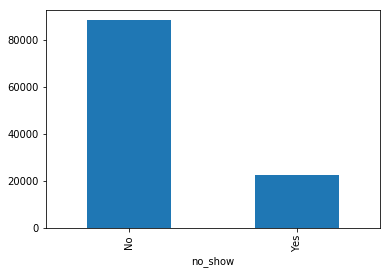

In [19]:
#number of nonshow
df.groupby('no_show')['patientid'].count().plot(kind='bar')


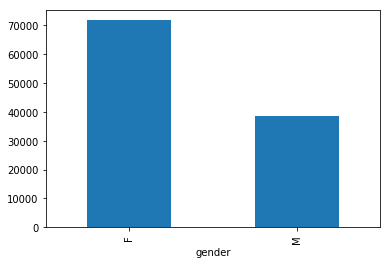

In [23]:
#number of male and female patients
df.groupby('gender')['patientid'].count().plot(kind='bar')


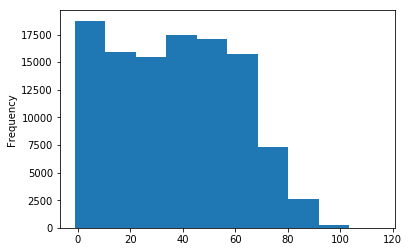

In [24]:
#exploring the range of ages
df['age'].plot(kind='hist')

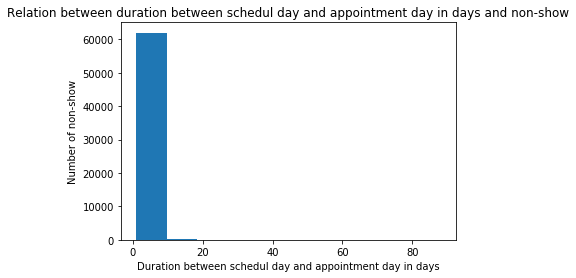

In [87]:
#exploring the differences between scheduled date and appointment date

df.groupby('patientid')['difference_days'].count().plot(kind='hist')
plt.ylabel('Number of non-show')
plt.xlabel('Duration between schedul day and appointment day in days')

plt.title('Relation between duration between schedul day and appointment day in days and non-show');
plt.savefig('duration.png')

In [26]:
#drawing Conclusions 

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: patientid, dtype: int64

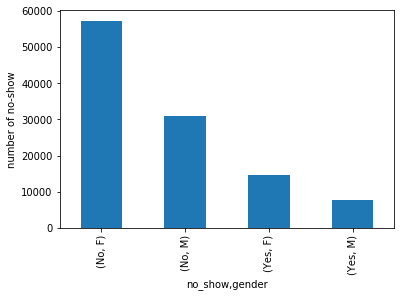

In [73]:
#relation between gender and statues
df_gender= df.groupby(['no_show','gender'])['patientid'].count()
df_gender.plot(kind='bar')
plt.ylabel('number of no-show')
plt.savefig('relation between gender and statues.png')
df_gender

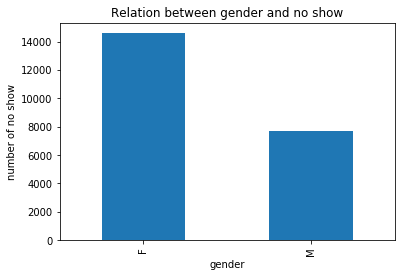

In [62]:
#relation between gender and no show
df_yes.groupby('gender')['patientid'].count().plot(kind='bar')
plt.ylabel('number of no show')
plt.title('Relation between gender and no show')
plt.savefig('Relation between gender and no show.png')


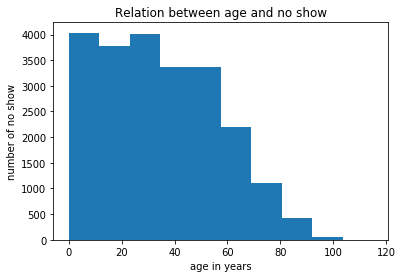

In [63]:
#relation between age and no show
df_yes['age'].plot(kind='hist')
plt.ylabel('number of no show')
plt.xlabel('age in years')

plt.title('Relation between age and no show')
plt.savefig('Relation between age and no show.png')


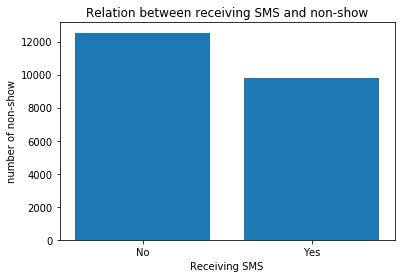

In [74]:
#relation between receving sms with the data and no show

df_sms=df_yes.groupby('sms_received')['patientid'].count()
plt.bar([1,2],df_sms,tick_label=['No','Yes'])
plt.xlabel('Receiving SMS')
plt.ylabel('number of non-show')
plt.title('Relation between receiving SMS and non-show');
plt.savefig('Relation between receiving SMS and non-show.png')


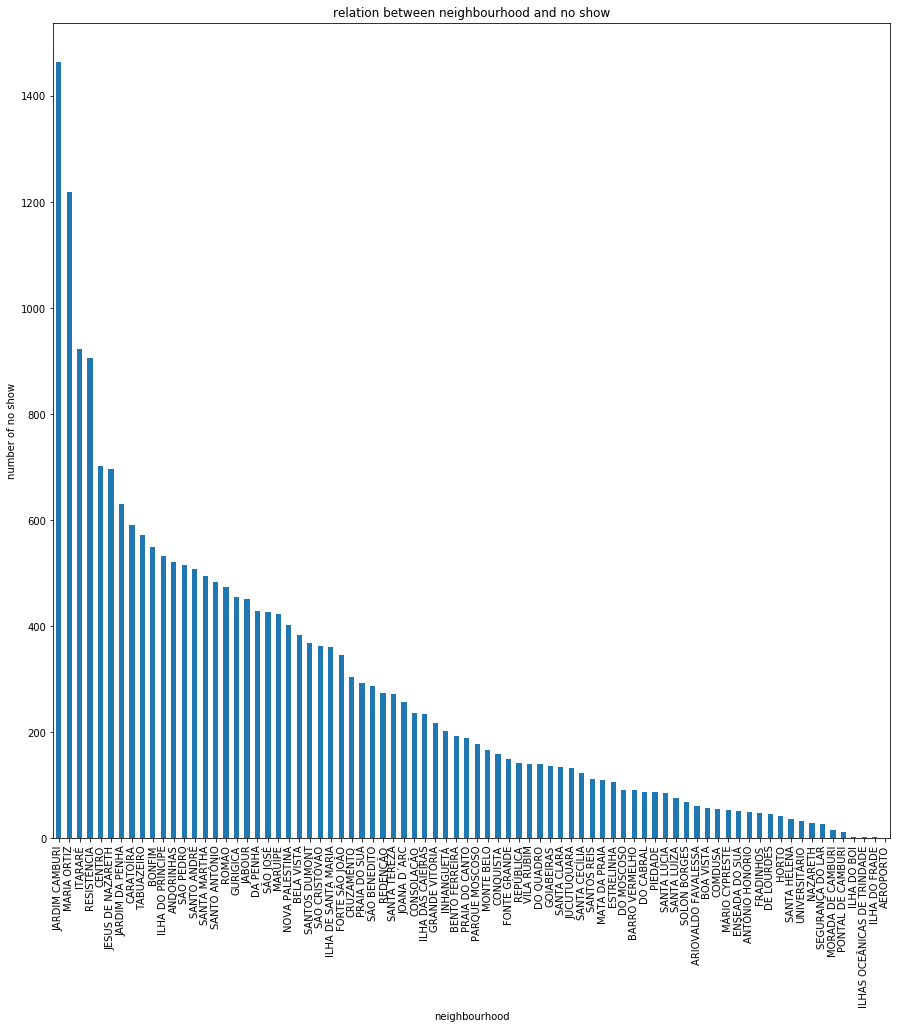

In [80]:
#which area receive much no show
df_yes.groupby('neighbourhood')['patientid'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,15))
plt.ylabel('number of no show')
plt.title ('relation between neighbourhood and no show')
plt.savefig('relation between neighbourhood and no show.png')

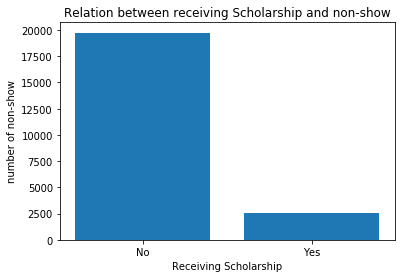

In [81]:
#relation between scholarship and no show

df_sch=df_yes.groupby('scholarship')['patientid'].count()
plt.bar([1,2],df_sch,tick_label=['No','Yes'])
plt.xlabel('Receiving Scholarship')
plt.ylabel('number of non-show')
plt.title('Relation between receiving Scholarship and non-show');
plt.savefig('Relation between receiving Scholarship and non-show.png')


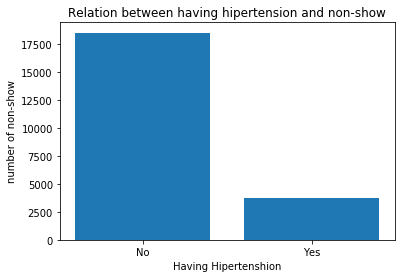

In [83]:
#relation between hipertension and no show
df_hy=df_yes.groupby('hipertension')['patientid'].count()
plt.bar([1,2],df_hy,tick_label=['No','Yes'])
plt.xlabel('Having Hipertenshion')
plt.ylabel('number of non-show')
plt.title('Relation between having hipertension and non-show');
plt.savefig('Relation between having hipertension and non-show.png')

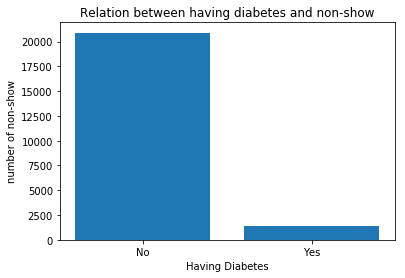

In [84]:
#relation between diabetes and no show
df_di=df_yes.groupby('diabetes')['patientid'].count()
plt.bar([1,2],df_di,tick_label=['No','Yes'])
plt.xlabel('Having Diabetes')
plt.ylabel('number of non-show')
plt.title('Relation between having diabetes and non-show');
plt.savefig('Relation between having diabetes and non-show.png')

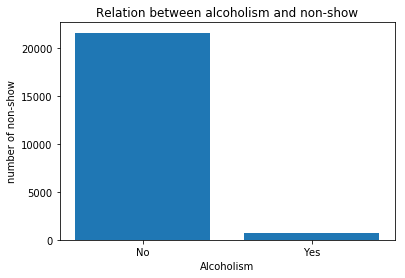

In [85]:
#relation between alcoholism and no show
df_al=df_yes.groupby('alcoholism')['patientid'].count()
plt.bar([1,2],df_al,tick_label=['No','Yes'])
plt.xlabel('Alcoholism')
plt.ylabel('number of non-show')
plt.title('Relation between alcoholism and non-show');
plt.savefig('Relation between alcoholism and non-show.png')

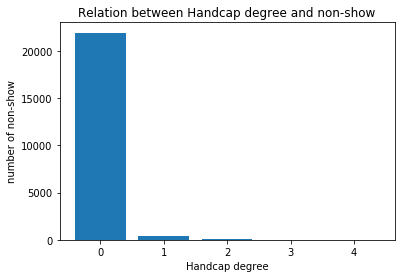

In [86]:
#relation between handcap and no show
df_hand=df_yes.groupby('handcap')['patientid'].count()
plt.bar([1,2,3,4,5],df_hand,tick_label=['0','1','2','3','4'])
plt.xlabel('Handcap degree')
plt.ylabel('number of non-show')
plt.title('Relation between Handcap degree and non-show');
plt.savefig('RRelation between Handcap degree and non-show.png')